# Pymaceuticals Inc.
---

### Analysis

- 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedData = pd.merge(study_results, mouse_metadata, how = "outer", on = "Mouse ID")
# Display the data table for preview
mergedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
miceTotal = len(mergedData["Mouse ID"].unique())
miceTotal

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
miceDuped = mergedData.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)
miceDupedId = mergedData.loc[miceDuped, "Mouse ID"].unique()
miceDupedId

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
miceDupedIdData = mergedData.loc[mergedData["Mouse ID"] == miceDupedId[0]]
miceDupedIdData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = mergedData.drop(miceDupedIdData.index)
cleanDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
miceTotalClean = len(cleanDF["Mouse ID"].unique())
miceTotalClean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen = cleanDF.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = regimen["Tumor Volume (mm3)"].mean()
median = regimen["Tumor Volume (mm3)"].median()
variance = regimen["Tumor Volume (mm3)"].var()
std = regimen["Tumor Volume (mm3)"].std()
sem = regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Tumor Volume Variance" : variance,
    "Tumor Volume Std. Dev." : std,
    "Tumor Volume Std. Err." : sem
})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary = regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

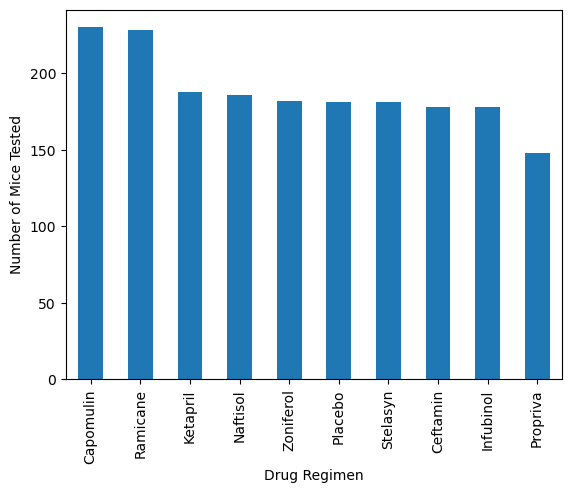

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
miceNumber = regimen["Mouse ID"].count().sort_values(ascending = False)
pd_totalMicePerRegimen = miceNumber.plot(kind = "bar", width = 0.5)

pd_totalMicePerRegimen.set_xlabel("Drug Regimen")
pd_totalMicePerRegimen.set_ylabel("Number of Mice Tested")

plt.show()


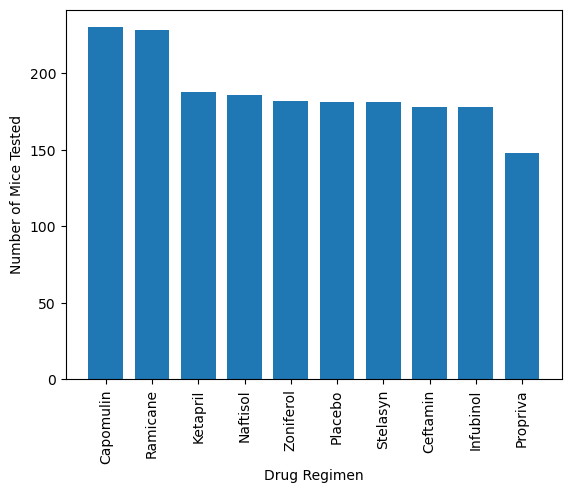

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

xAxis = np.arange(len(miceNumber))
xLabels = list(miceNumber.index.values)
py_totalMicePerRegimen = plt.bar(xAxis, miceNumber, width = 0.75)

plt.xticks(xAxis, xLabels, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

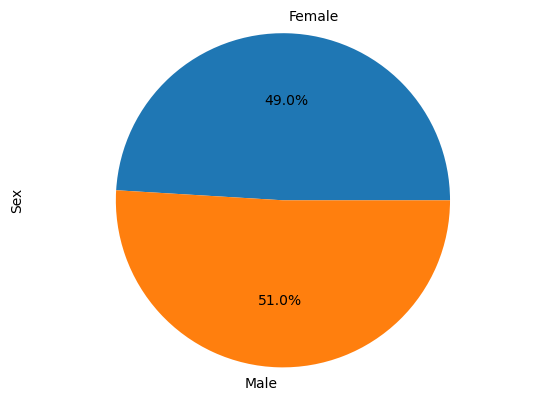

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceSex = cleanDF.groupby("Sex")["Sex"].count() 
pd_miceSexChart = miceSex.plot(kind = "pie", autopct = "%1.1f%%")
plt.axis("equal")

plt.show()

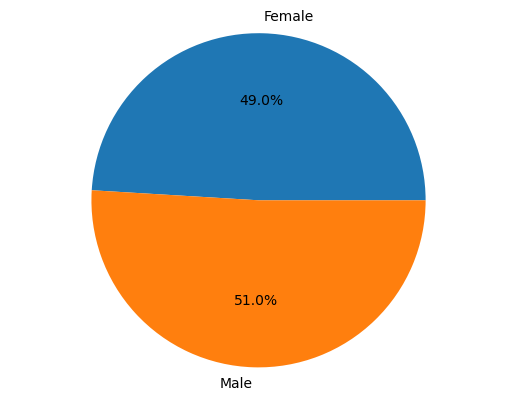

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = miceSex.index
py_miceSexChart = plt.pie(miceSex, labels = sex, autopct = "%1.1f%%")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grTumorVol = cleanDF.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorVolDF = grTumorVol.reset_index()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    grTumorVol = tumorVolDF.loc[tumorVolDF["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorVolData.append(grTumorVol)
    
    quartiles = grTumorVol.quantile([0.25, 0.5, 0.75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    mean = grTumorVol.mean()
    IQR = upperQ - lowerQ
    
    upperBound = upperQ + (1.5 * IQR)
    lowerBound = lowerQ - (1.5 * IQR)
    
    # Determine outliers using upper and lower bounds
    outliers = grTumorVol.loc[(grTumorVol < lowerBound)
                              | (grTumorVol > upperBound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


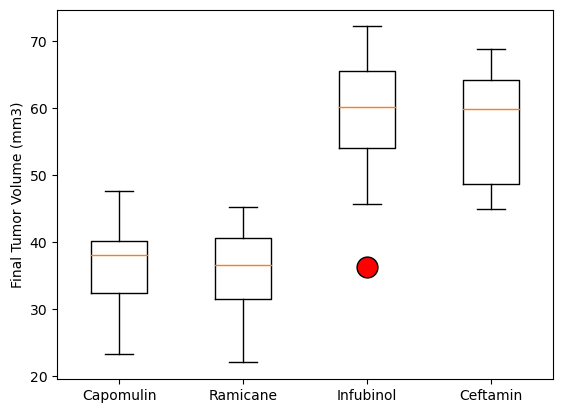

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, boxPlot = plt.subplots()
boxPlot.boxplot(tumorVolData, labels = treatments, flierprops = {"markerfacecolor": "r", "markersize": 15})
boxPlot.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

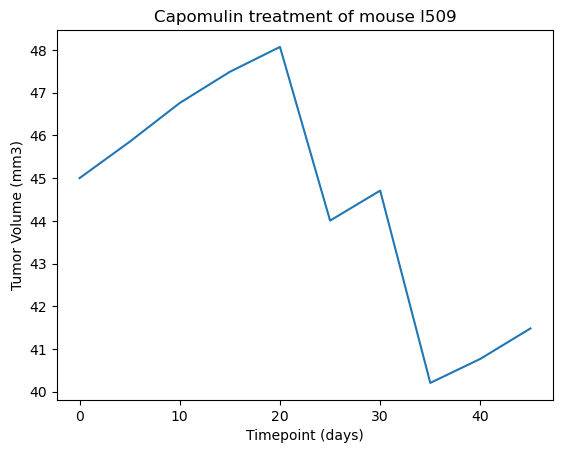

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin"]
mouseID = "l509"
mouseDF = capomulinDF.loc[capomulinDF["Mouse ID"] == mouseID]

linePlot = plt.plot(mouseDF["Timepoint"], mouseDF["Tumor Volume (mm3)"], color = "#1f77b4")
plt.title(f"Capomulin treatment of mouse {mouseID}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

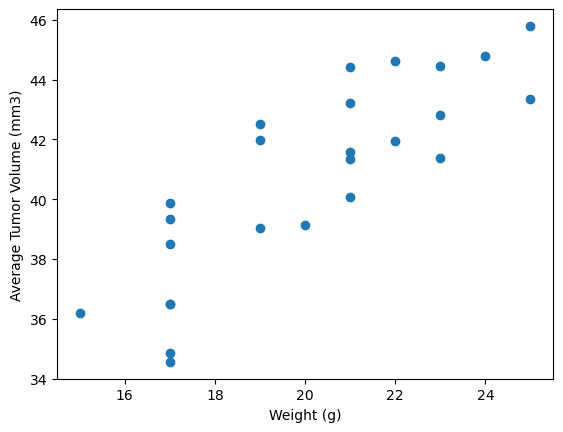

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinGP = capomulinDF.groupby("Mouse ID").mean()
miceWeight = capomulinGP["Weight (g)"]
miceTumor = capomulinGP["Tumor Volume (mm3)"]

plt.scatter(miceWeight, miceTumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


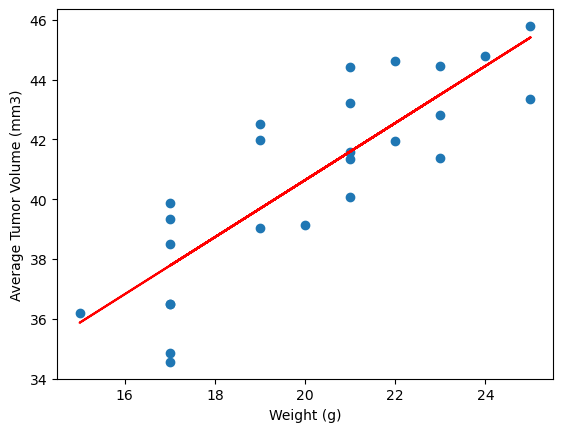

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(miceWeight, miceTumor)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(miceWeight, miceTumor)
regress = miceWeight * slope + intercept

plt.scatter(miceWeight, miceTumor)
plt.plot(miceWeight, regress, color = "r")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()